In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
gdp_df = pd.read_csv("/Users/jonathanfarro/Documents/NSS/Python/projects/gdp-and-internet-usage-jonnyfarro/data/gdp_percapita.csv")
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [28]:
gdp_df.shape

(7662, 4)

In [29]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

How many rows and columns are in `gdp_df`? What are the data types of each column? 

7662,4 -objects 

In [32]:
gdp_df = gdp_df.drop(columns= ['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area':'country','Year':'year','Value':'GDP_Per_Capita'})
gdp_df.head()

,country,year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [34]:
count_years = gdp_df.groupby('country')['year'].count().reset_index(name = 'years_count')
count_years

,country,years_count
0,Afghanistan,20
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
...,...,...
237,Viet Nam,33
238,West Bank and Gaza,29
239,World,33
240,Zambia,33


In [35]:
c_missing_years = count_years.loc[count_years['years_count'] != 33 ]
c_missing_years.describe()


,years_count
count,40.000000
mean,24.900000
std,6.258533
min,10.000000
25%,22.000000
50%,28.000000
75%,29.000000
max,32.000000


**_number of countries missing years = 40_**

In [38]:
full_years = count_years.loc[count_years['years_count'] == 33 ].count()
full_years.head()

country        202
years_count    202
dtype: int64

**_202 countries with 33 years of data_**

In [45]:
sns.set_theme(style="darkgrid")
sns.histplot(data=gdp_df_2020, x="GDP_Per_Capita" ,kde=True, color= 'red')
plt.title('gdp per capita')
plt.xlabel('GDP')
plt.ylabel('')
plt.show()

NameError: name 'gdp_df_2020' is not defined

In [47]:

gdp_df_2020 = gdp_df.loc[gdp_df['year'] == 2020]
gdp_df_2020 = gdp_df_2020.sort_values(by = 'GDP_Per_Capita', ascending = False).reset_index(drop=True)
gdp_df_2020 = gdp_df_2020.round(2)


In [49]:
# a density plot, a boxplot, and a violin plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

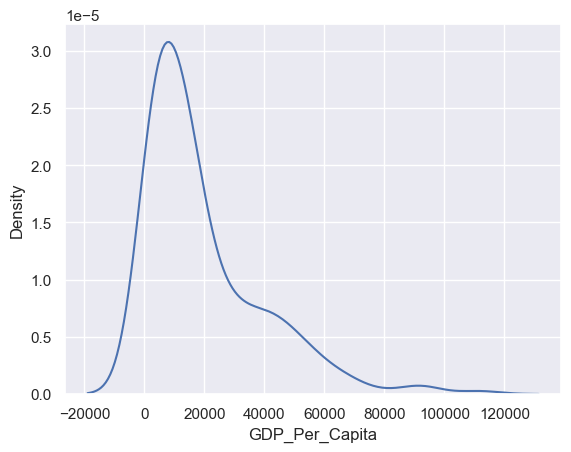

In [51]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

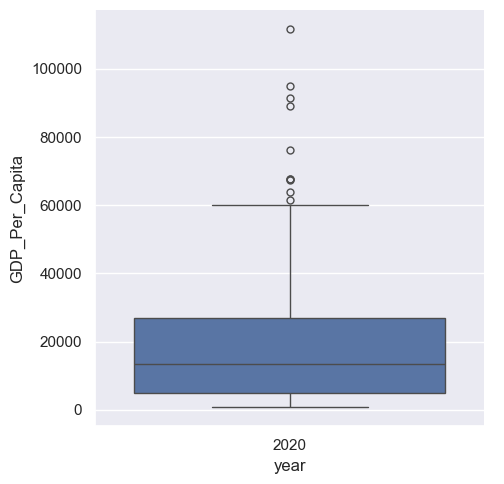

In [52]:
sns.catplot(data=gdp_df_2020, x="year", y="GDP_Per_Capita", kind="box")


<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

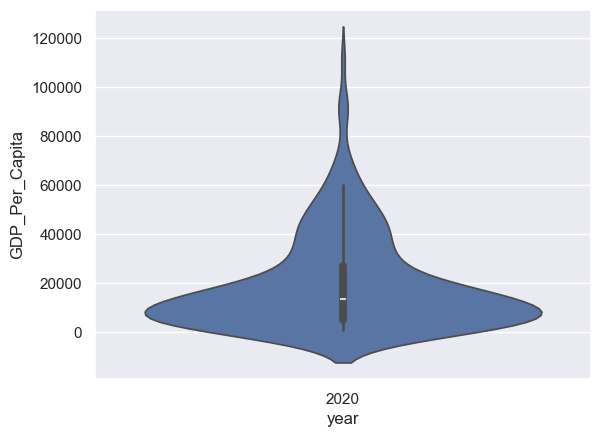

In [53]:

# plot
sns.violinplot(x=gdp_df_2020["year"], y=gdp_df_2020["GDP_Per_Capita"])



9. What was the median GDP per capita value in 2020?

96759.335

In [58]:


median_gdp = gdp_df_2020["GDP_Per_Capita"].median()
print(median_gdp)


13358.0


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [62]:
gdp_decades = gdp_df[gdp_df['year'].isin([1990, 2000, 2010, 2020])]
gdp_decades = gdp_decades.reset_index (drop=True)
gdp_decades

,country,year,GDP_Per_Capita
0,Afghanistan,2020,1968.341002
1,Afghanistan,2010,2026.163818
2,Africa Eastern and Southern,2020,3455.023119
3,Africa Eastern and Southern,2010,3513.315920
4,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
916,Zambia,1990,2290.039226
917,Zimbabwe,2020,1990.319419
918,Zimbabwe,2010,1799.540233
919,Zimbabwe,2000,2750.601236


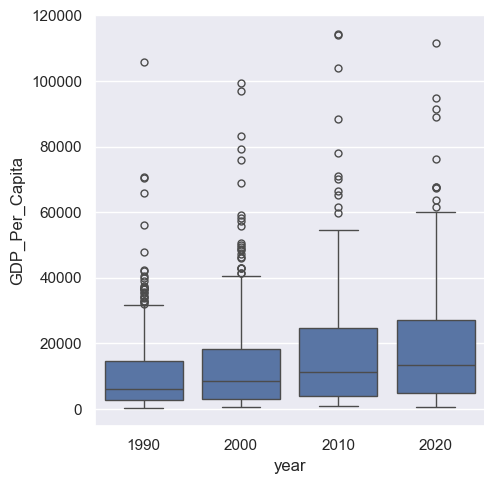

In [64]:
sns.catplot(data=gdp_decades, x="year", y="GDP_Per_Capita", kind="box")

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

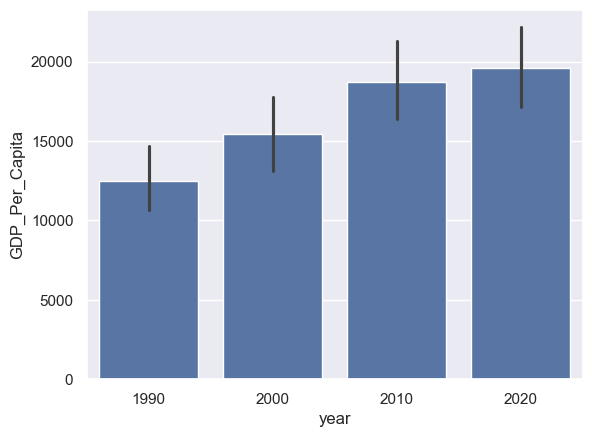

In [65]:
sns.barplot(gdp_decades, x="year", y="GDP_Per_Capita")

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

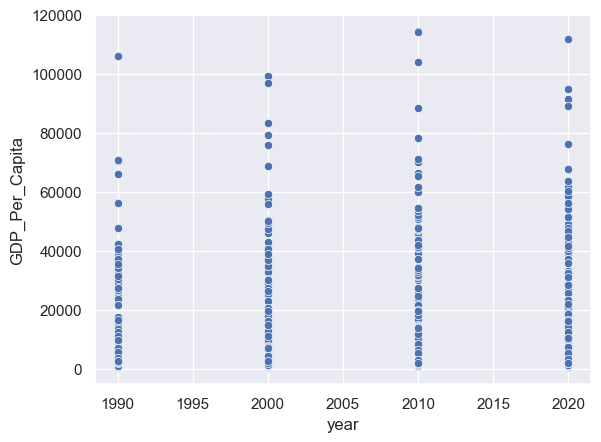

In [66]:
sns.scatterplot(data=gdp_decades, x="year", y="GDP_Per_Capita")

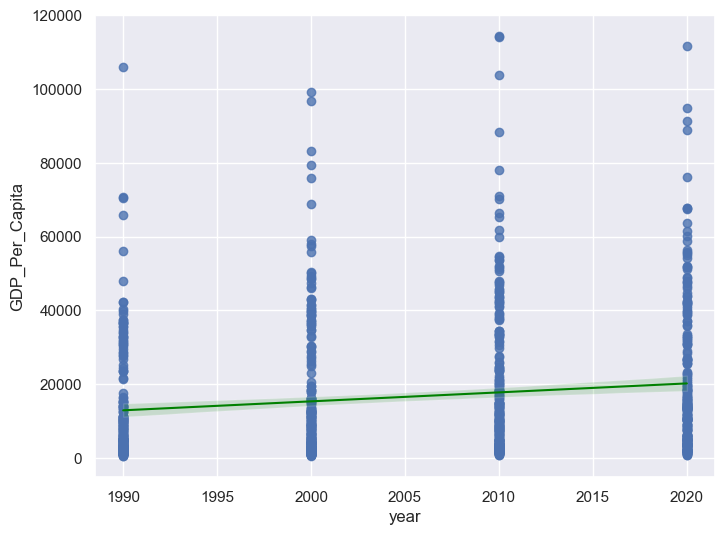

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "green", "linewidth": 1.5},
    ax=ax
)
plt.show()

# 10


In [72]:
# i think boxplot and barplot showed the most information and shows GDP growth by decade.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [128]:
gdp_filtered = gdp_df.loc[(gdp_df['GDP_Per_Capita'] > 100000) & (gdp_df['year'] == 1990)]
gdp_filtered

,country,year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


 # #11. United Arab Emirates

# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [80]:
gdp_2020 = gdp_df.loc[(gdp_df['year'] == 2020)]






In [82]:
gdp_2020.max()

country                Zimbabwe
year                       2020
GDP_Per_Capita    111751.314751
dtype: object

In [84]:
zimbabwe = gdp_df.loc[(gdp_df['country'] == "Zimbabwe")]
zimbabwe

,country,year,GDP_Per_Capita
7629,Zimbabwe,2022,2143.237574
7630,Zimbabwe,2021,2115.144555
7631,Zimbabwe,2020,1990.319419
7632,Zimbabwe,2019,2203.396810
7633,Zimbabwe,2018,2399.621551
7634,Zimbabwe,2017,2331.780833
7635,Zimbabwe,2016,2286.623549
7636,Zimbabwe,2015,2313.878553
7637,Zimbabwe,2014,2316.954536
7638,Zimbabwe,2013,2333.644532


<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

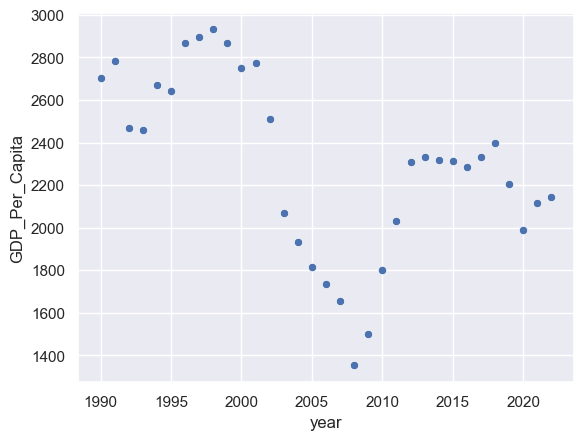

In [86]:
sns.scatterplot(zimbabwe, x="year", y="GDP_Per_Capita")

In [88]:
gdp_2020.min()

country           Afghanistan
year                     2020
GDP_Per_Capita     711.355263
dtype: object

In [90]:
afgan = gdp_df.loc[(gdp_df['country'] == "Afghanistan")]


<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

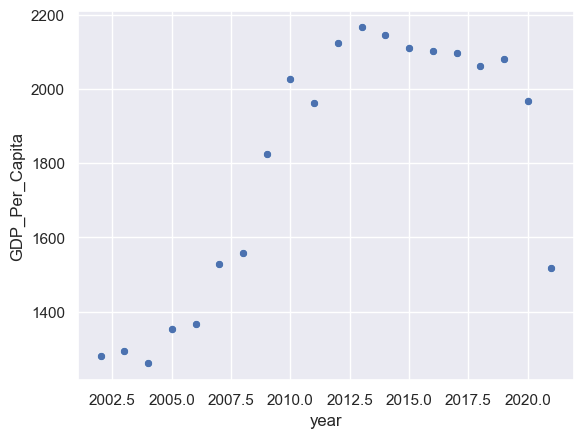

In [92]:
sns.scatterplot(afgan, x="year", y="GDP_Per_Capita")

In [94]:
gdp_2020.describe()

,year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [96]:
gdp_1990 = gdp_df.loc[(gdp_df['year'] == 1990)]
gdp_1990.GDP_Per_Capita.min()

460.1236966805106

In [98]:
this = pd.concat([gdp_2020, gdp_1990])

In [101]:
gdp_2020['GDP_Per_Capita'].mean()


19586.75444556196

In [103]:
gdp_1990['GDP_Per_Capita'].mean()

12506.08837386169

In [105]:
# 13 bonus
merged = pd.merge(gdp_1990, gdp_2020, on='country')

merged = merged.rename(columns = {'GDP_Per_Capita_x': 'gdp_1990', 'GDP_Per_Capita_y': 'gdp_2020','year_x':'year','year_y':'year'})

less = merged[merged.gdp_2020 < merged.gdp_1990]

less = less.reset_index(drop=True)

less['gdp_1990'] = less['gdp_1990'].round(0)

less['gdp_2020'] = less['gdp_2020'].round(0)

less


,country,year,gdp_1990,year,gdp_2020
0,Barbados,1990,14097.0,2020,13806.0
1,Brunei,1990,70359.0,2020,61604.0
2,Burundi,1990,1175.0,2020,711.0
3,Central African Republic,1990,1201.0,2020,848.0
4,Congo,1990,5007.0,2020,3385.0
5,Dem. Rep. Congo,1990,1750.0,2020,1044.0
6,Fragile and conflict affected situations,1990,4865.0,2020,4358.0
7,Gabon,1990,17559.0,2020,13903.0
8,Guinea-Bissau,1990,1998.0,2020,1804.0
9,Haiti,1990,3613.0,2020,2970.0


In [134]:
internet = pd.read_csv('/Users/jonathanfarro/Documents/NSS/Python/projects/gdp-and-internet-usage-jonnyfarro/data/internet_use.csv')
internet 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [136]:
internet = internet.drop(columns= ['Value Footnotes'])
        

In [138]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [140]:
internet = internet.rename(columns = { 'Country or Area': 'country', 'Year': 'year','Value':'Internet_Users_Pct'})
internet

,country,year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [185]:
internet = internet.round()
internet


,country,year,Internet_Users_Pct
0,Afghanistan,2019,18.0
1,Afghanistan,2018,17.0
2,Afghanistan,2017,14.0
3,Afghanistan,2016,11.0
4,Afghanistan,2015,8.0
...,...,...,...
6078,Zimbabwe,1997,0.0
6079,Zimbabwe,1996,0.0
6080,Zimbabwe,1995,0.0
6081,Zimbabwe,1994,0.0


17. What is the first year to have a non-zero internet users percentage value? # 2001


In [188]:
internet.loc[internet['Internet_Users_Pct'] > 0 ].sort_values(by = 'Internet_Users_Pct', ascending = True
                                                              )

,country,year,Internet_Users_Pct
6074,Zimbabwe,2001,1.0
4112,Nigeria,2003,1.0
4111,Nigeria,2004,1.0
1333,Costa Rica,1996,1.0
4079,Niger,2008,1.0
...,...,...,...
398,Bahrain,2022,100.0
3057,Kuwait,2023,100.0
3058,Kuwait,2022,100.0
2586,Iceland,2020,100.0


#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [196]:
int_2000 = internet.loc[internet['year'] == 2000]
int_2014 = internet.loc[internet['year'] == 2014]
int_2000
int_2014

,country,year,Internet_Users_Pct
5,Afghanistan,2014,7.0
28,Albania,2014,54.0
57,Algeria,2014,30.0
87,Andorra,2014,86.0
114,Angola,2014,21.0
...,...,...,...
5937,Viet Nam,2014,41.0
5960,Virgin Islands (US),2014,50.0
6003,Yemen,2014,23.0
6031,Zambia,2014,6.0


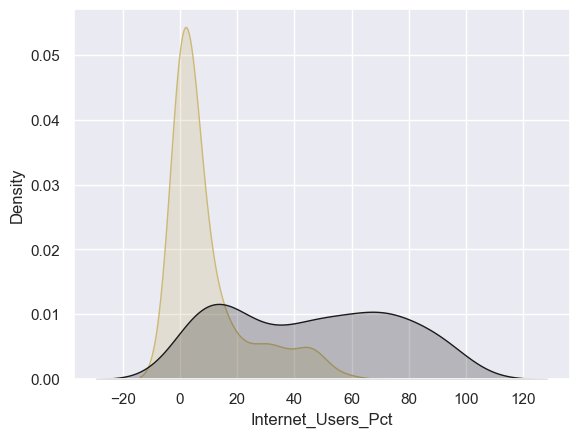

In [283]:
sns.set_theme(style='darkgrid')
sns.kdeplot(int_2000['Internet_Users_Pct'], fill = True, color = 'y')
sns.kdeplot(int_2014['Internet_Users_Pct'], fill = True, color = 'k')
plt.show()

#### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [241]:
int_2014.country.loc[int_2014.Internet_Users_Pct < 5].count()


10

#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [324]:
gdp_and_internet_use = pd.merge(internet, gdp_df, 
                               left_on = ['country','year'], right_on = ['country', 'year'],
                               how = 'outer')
gdp_iu = gdp_and_internet_use

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
    

In [327]:
gdp_iu_2014 = gdp_iu.loc[gdp_iu.year == 2014] 

In [336]:
gdp_iu_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(6  )

,country,year,Internet_Users_Pct,GDP_Per_Capita
2780,Falkland (Malvinas) Islands,2014,98.0,NaN
3820,Iceland,2014,98.0,50450.741612
794,Bermuda,2014,97.0,77361.104881
6243,Norway,2014,96.0,62838.515727
2100,Denmark,2014,96.0,52048.335493
5023,Luxembourg,2014,95.0,113313.578898


In [344]:
top_3 = gdp_iu.loc[gdp_iu['country'] == ['Iceland'] | gdp_iu['country'] == ['Bermuda'] | gdp_iu['country'] == ['Norway']]
top_3

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_32034/896481500.py:1: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  top_3 = gdp_iu.loc[gdp_iu['country'] == ['Iceland'] | gdp_iu['country'] == ['Bermuda'] | gdp_iu['country'] == ['Norway']]


ValueError: Arrays were different lengths: 9112 vs 1